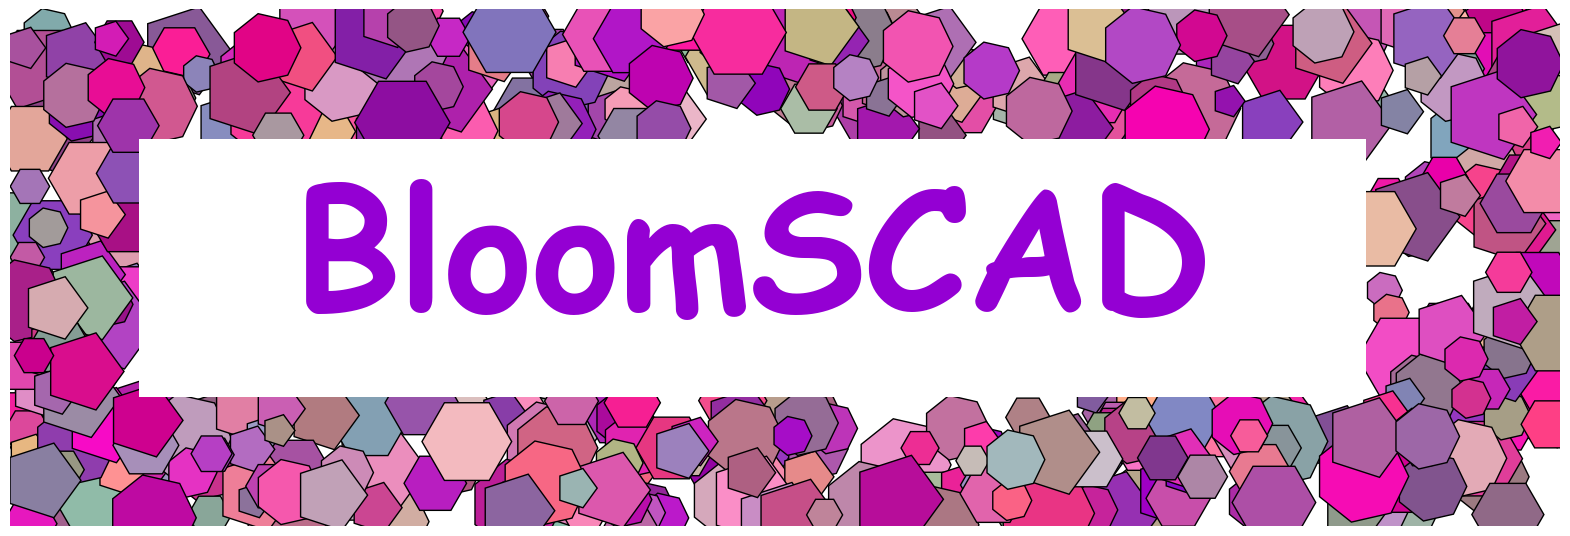

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.colors as mcolors

def create_flower(center, size, petals):
    """Generate the vertices of a simple flower shape given a center, size, and number of petals."""
    vertices = []
    for petal in range(petals):
        angle = 2 * np.pi * petal / petals
        x = center[0] + size * np.cos(angle)
        y = center[1] + size * np.sin(angle)
        vertices.append((x, y))
    return vertices

def create_random_color():
    """Generate a random color in the purple-pink palette."""
    purple = np.array([128/255, 0, 128/255])  # Purple
    pink = np.array([255/255, 192/255, 203/255])  # Pink
    return mcolors.to_hex(np.random.uniform(purple, pink))

def plot_shape(ax, vertices, color):
    """Plot a shape on the given axes."""
    ax.fill(*zip(*vertices), color=color, edgecolor='black')

def plot_random_shapes(ax, shape_count, shape_func, size_range, petal_range, color_func, exclusion_zone):
    """
    Plot random flower shapes on the axis, avoiding the exclusion zone.
    """
    for _ in range(shape_count):
        while True:
            random_x = np.random.uniform(0, cols * 2)
            random_y = np.random.uniform(0, rows)
            if not (exclusion_zone[0] < random_x < exclusion_zone[2] and exclusion_zone[1] < random_y < exclusion_zone[3]):
                break
        random_size = np.random.uniform(size_range[0], size_range[1])
        random_petals = np.random.randint(petal_range[0], petal_range[1])
        shape_vertices = shape_func((random_x, random_y), random_size, random_petals)
        plot_shape(ax, shape_vertices, color=color_func())

# Parameters
frame_edge_width = 4
cols = 24
rows = 16
flower_count = 500
size_range = (0.5, 1.5)
petal_range = (5, 8)  # Range for number of petals
exclusion_zone = (frame_edge_width, frame_edge_width, cols * 2 - frame_edge_width* 3 / 2, rows - frame_edge_width)

font_sz = 120

# Create the figure and axis for landscape frame
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(0, cols * 2)
ax.set_ylim(0, rows)
ax.set_aspect('equal')
ax.axis('off')

# Plot random flowers
plot_random_shapes(ax, flower_count, create_flower, size_range, petal_range, create_random_color, exclusion_zone)

# Add the white rectangle in the middle
white_rect = patches.Rectangle((exclusion_zone[0], exclusion_zone[1]), exclusion_zone[2] - exclusion_zone[0], 
                               exclusion_zone[3] - exclusion_zone[1], linewidth=1, edgecolor='none', facecolor='white')
ax.add_patch(white_rect)

# Add text in the middle of the white rectangle
text_x_center = (exclusion_zone[2] + exclusion_zone[0]) / 2
text_y_center = (exclusion_zone[3] + exclusion_zone[1]) / 2

text = ax.text(text_x_center, text_y_center, 'BloomSCAD', fontsize=font_sz, va='center', ha='center',
               weight='bold', color='darkviolet', fontname='Comic Sans MS')

plt.savefig('logo_bloomscad_v1.0.png', dpi=300, bbox_inches='tight')

plt.show()
